# Get Started
## Activate the Conda env

```
    # create the env if you have not: conda create --name dtsc615
    conda activate dtsc615
```

## Install the dependencies
```
    conda install -c anaconda jupyter
    conda install -c anaconda tensorflow-gpu
    conda install -c anaconda pandas
    conda install -c anaconda matplotlib
```

In [2]:
#!pip install tensorflow
#!pip install keras

In [3]:
from jupyter_core.paths import jupyter_data_dir
print(jupyter_data_dir())   

import sys
sys.executable

/home/hui/.local/share/jupyter


'/home/hui/anaconda3/envs/tensorflow_gpu/bin/python'

In [4]:
!conda list tensorflow-gpu

# packages in environment at /home/hui/anaconda3/envs/tensorflow_gpu:
#
# Name                    Version                   Build  Channel
tensorflow-gpu            2.4.1                h30adc30_0  


## Get the GPU/CPU info

In [5]:
import tensorflow as tf
import tensorflow.keras.backend as K
K.clear_session()
# tf.debugging.set_log_device_placement(True)

print("Here: ")
print(tf.test.is_built_with_cuda())
print()

if tf.test.gpu_device_name():
    print("#############################################################")
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
    print("#############################################################")
else:
    print("Please install GPU version of TF")

Here: 
True

#############################################################
Default GPU Device: /device:GPU:0
#############################################################


2021-12-31 20:25:07.742370: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-31 20:25:07.742553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:25:07.742998: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 with Max-Q Design computeCapability: 7.5
coreClock: 1.185GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 357.69GiB/s
2021-12-31 20:25:07.743047: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-31 20:25:07.743073: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-12-31 20:25:07.743089: I tensorflow/stream

In [6]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2021-12-31 14:49:02.193266: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-31 14:49:02.193419: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 14:49:02.193806: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 with Max-Q Design computeCapability: 7.5
coreClock: 1.185GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 357.69GiB/s
2021-12-31 14:49:02.193843: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-31 14:49:02.193864: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-12-31 14:49:02.193875: I tensorflow/stream

In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2021-12-31 14:49:03.132560: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-31 14:49:03.132689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 14:49:03.133042: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 with Max-Q Design computeCapability: 7.5
coreClock: 1.185GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 357.69GiB/s
2021-12-31 14:49:03.133076: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-31 14:49:03.133095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-12-31 14:49:03.133106: I tensorflow/stream

In [8]:
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Preprocessing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

from tensorflow.keras.optimizers import Adagrad, Adadelta, RMSprop, Adam, Adamax

In [10]:
tf.__version__

'2.4.1'

## Splitting the images

In [11]:
!pip install directory_structure

  Using cached directory_structure-1.1.2-py3-none-any.whl (4.3 kB)
  Using cached emoji-1.6.1-py3-none-any.whl


In [12]:
from directory_structure import Tree

print(Tree("./dataset/train/"))
print(Tree("./dataset/val/"))
print(Tree("./dataset/test/"))

📂 train
|_📁 cat
|_📁 dog
📂 val
|_📁 cat
|_📁 dog
📂 test
|_📁 cat
|_📁 dog


We apply transformation on the training set images in order to avoid overfitting. The transformation includes geomatrical transformation, rotating, zoom in/ ou, and etc and it is called "image augmentation", which applies to the training set in order to avoid the CNN model to overfitting.

### Training Set

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


# rescale - the transformation of the pixel val by 255 to have range 0 - 1. Similar to normalization.

In [14]:
train_set = train_datagen.flow_from_directory(
    './dataset/train/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')


# target_size - image size that we gonna fit into the CNN model.
#bat_size - the # of image that we want per each batch, default is 32.
#class_mode - the outcome that we expect to have.

Found 16000 images belonging to 2 classes.


### Val set

In [15]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
val_set = val_datagen.flow_from_directory(
    './dataset/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 4000 images belonging to 2 classes.


### Test Set

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
# this will act like transformation that we have with the feature scaling where we only apply transformation on the test set. 
# However, with the image data, we apply rescale to the test set.

In [18]:
test_set = test_datagen.flow_from_directory(
    './dataset/test/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 5000 images belonging to 2 classes.


# The CNN model

## The model

1) Convolution Layer:

* filters - the feature detector/ filter
* kernel_size - the size of the feature detector/ filter matrix
* input_shape - the image size that we gonna have. Since we resize it to (64, 64) and then 3 as we are working on color image. If we have black/ white image, we would have 1.

2) MaxPooling:

* pool_size - the frame that select/ workthrough the feature map
* strides - the # of shift of the frame on the feature map
* padding - if the stride out of matric range, we can ignore it with "valid" parameter val

3) Second Convolution Layer
4) Second MaxPooling
5) Flatterning
6) Fully Connected Layer
7) Output Layer

In [7]:
cnn = Sequential([
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[64, 64, 3]),
        MaxPool2D(pool_size=2, strides=2, padding="valid"),
        Conv2D(filters=32, kernel_size=3, activation="relu"),
        MaxPool2D(pool_size=2, strides=2, padding="valid"),
        Flatten(),
        Dense(units=128, activation="relu"),
        Dense(units=1, activation="sigmoid"),
    ])

2021-12-31 20:25:51.165740: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-31 20:25:51.165897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:25:51.166263: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 with Max-Q Design computeCapability: 7.5
coreClock: 1.185GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 357.69GiB/s
2021-12-31 20:25:51.166293: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-31 20:25:51.166309: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-12-31 20:25:51.166319: I tensorflow/stream

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [19]:
def CNN_model(optimizer, loss_fun, metrics_list):
    cnn = Sequential([
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[64, 64, 3]),
        MaxPool2D(pool_size=2, strides=2, padding="valid"),
        Conv2D(filters=32, kernel_size=3, activation="relu"),
        MaxPool2D(pool_size=2, strides=2, padding="valid"),
        Flatten(),
        Dense(units=128, activation="relu"),
        Dense(units=1, activation="sigmoid"),
    ])

    cnn.compile(optimizer=optimizer, loss=loss_fun, metrics=metrics_list)
    
    return cnn

In [20]:
# cnn.summary()

# Training the CNN

## Train the CNN on the training set and evaluating the test set

Setup the optimizers along with the hyperparameters.

In [21]:
optimizer_list = [
    {"name": "Adagrad", "model": Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, name="Adagrad")}, 
    {"name": "Adadelta", "model": Adadelta(learning_rate=0.001, rho=0.95, name='Adadelta')},
    {"name": "RMSprop", "model": RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, name='RMSprop')},
    {"name": "Adam", "model": Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, name='Adam')},
    {"name": "Adamax", "model": Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, name='Adamax')},
]

In [22]:
optimizer_model_fit = []

In [23]:
for optimizer in optimizer_list:
    optimizer_model_fit.append({
        "name": optimizer["name"],
        "fit_model": CNN_model(optimizer["model"], "binary_crossentropy", ["accuracy"]),
    })

2021-12-31 14:49:58.458666: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-31 14:49:58.458845: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 14:49:58.459195: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 with Max-Q Design computeCapability: 7.5
coreClock: 1.185GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 357.69GiB/s
2021-12-31 14:49:58.459236: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-31 14:49:58.459259: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-12-31 14:49:58.459271: I tensorflow/stream

In [24]:
# cnn.compile(optimizer=Adagrad(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
# cnn.fit(x=train_set, validation_data=val_set, epochs=25)

Training for each optimizers.

In [25]:
optimizer_model_trained = []

In [26]:
for trained_model in optimizer_model_fit:
    optimizer_model_trained.append({
        "name": trained_model["name"],
        "trained_model": trained_model["fit_model"].fit(x=train_set, validation_data=val_set, epochs=25),
    })

2021-12-31 14:50:13.436247: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-31 14:50:13.456061: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/25


2021-12-31 14:50:13.866074: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-12-31 14:50:14.200243: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-12-31 14:50:15.447615: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-12-31 14:50:15.496455: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


500/500 [==============================] - 71s 133ms/step - loss: 0.6923 - accuracy: 0.5173 - val_loss: 0.6871 - val_accuracy: 0.5788
Epoch 2/25
500/500 [==============================] - 64s 128ms/step - loss: 0.6872 - accuracy: 0.5628 - val_loss: 0.6821 - val_accuracy: 0.5940
Epoch 3/25
500/500 [==============================] - 63s 127ms/step - loss: 0.6822 - accuracy: 0.5810 - val_loss: 0.6770 - val_accuracy: 0.5822
Epoch 4/25
500/500 [==============================] - 64s 127ms/step - loss: 0.6752 - accuracy: 0.5927 - val_loss: 0.6674 - val_accuracy: 0.6140
Epoch 5/25
500/500 [==============================] - 64s 128ms/step - loss: 0.6689 - accuracy: 0.6048 - val_loss: 0.6589 - val_accuracy: 0.6302
Epoch 6/25
500/500 [==============================] - 64s 128ms/step - loss: 0.6637 - accuracy: 0.6124 - val_loss: 0.6504 - val_accuracy: 0.6310
Epoch 7/25
500/500 [==============================] - 63s 126ms/step - loss: 0.6540 - accuracy: 0.6228 - val_loss: 0.6439 - val_accuracy: 0.6

In [30]:
# print(dir(optimizer_model_trained[0]["trained_model"].history))

['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [52]:
def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)), dpi=80)

In [50]:
def plot_model_result_accuracy(model_list):
    plt.plot(model_list[0]["trained_model"].history['accuracy'], marker="o", color='red', label=(model_list[0]["name"]+" train"))
    plt.plot(model_list[0]["trained_model"].history['val_accuracy'], marker="x", color='red', label=(model_list[0]["name"]+" test"))
    plt.plot(model_list[1]["trained_model"].history['accuracy'], marker="o", color='green', label=(model_list[1]["name"]+" train"))
    plt.plot(model_list[1]["trained_model"].history['val_accuracy'], marker="x", color='green', label=(model_list[1]["name"]+" test"))
    plt.plot(model_list[2]["trained_model"].history['accuracy'], marker="o", color='blue', label=(model_list[2]["name"]+" train"))
    plt.plot(model_list[2]["trained_model"].history['val_accuracy'], marker="x", color='blue', label=(model_list[2]["name"]+" test"))
    plt.plot(model_list[3]["trained_model"].history['accuracy'], marker="o", color='brown', label=(model_list[3]["name"]+" train"))
    plt.plot(model_list[3]["trained_model"].history['val_accuracy'], marker="x", color='brown', label=(model_list[3]["name"]+" test"))
    plt.plot(model_list[4]["trained_model"].history['accuracy'], marker="o", color='magenta', label=(model_list[4]["name"]+" train"))
    plt.plot(model_list[4]["trained_model"].history['val_accuracy'], marker="x", color='magenta', label=(model_list[4]["name"]+" test"))

    plt.title("Optimizers Classification Accuracy")
    plt.xlabel("Epoches")
    plt.ylabel("Accuracy Rate")
    plt.legend()
    plt.show()

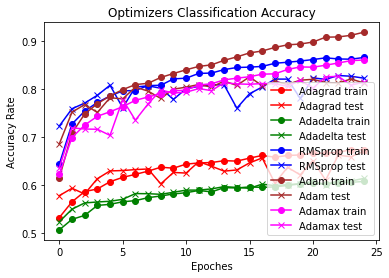

In [54]:
plot_model_result_accuracy(optimizer_model_trained)

In [55]:
def plot_model_result_loss(model_list):
    plt.plot(model_list[0]["trained_model"].history['loss'], marker="o", color='red', label=(model_list[0]["name"]+" train"))
    plt.plot(model_list[0]["trained_model"].history['val_loss'], marker="x", color='red', label=(model_list[0]["name"]+" test"))
    plt.plot(model_list[1]["trained_model"].history['loss'], marker="o", color='green', label=(model_list[1]["name"]+" train"))
    plt.plot(model_list[1]["trained_model"].history['val_loss'], marker="x", color='green', label=(model_list[1]["name"]+" test"))
    plt.plot(model_list[2]["trained_model"].history['loss'], marker="o", color='blue', label=(model_list[2]["name"]+" train"))
    plt.plot(model_list[2]["trained_model"].history['val_loss'], marker="x", color='blue', label=(model_list[2]["name"]+" test"))
    plt.plot(model_list[3]["trained_model"].history['loss'], marker="o", color='brown', label=(model_list[3]["name"]+" train"))
    plt.plot(model_list[3]["trained_model"].history['val_loss'], marker="x", color='brown', label=(model_list[3]["name"]+" test"))
    plt.plot(model_list[4]["trained_model"].history['loss'], marker="o", color='magenta', label=(model_list[4]["name"]+" train"))
    plt.plot(model_list[4]["trained_model"].history['val_loss'], marker="x", color='magenta', label=(model_list[4]["name"]+" test"))

    plt.title("Cross Entropy Loss")
    plt.xlabel("Epoches")
    plt.ylabel("Loss Rate")
    plt.legend()
    plt.show()

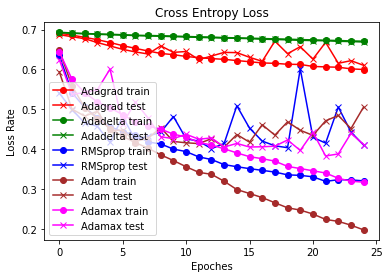

In [57]:
plot_model_result_loss(optimizer_model_trained)